# Heart Disease Prediction

### Abstract
Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion.

### Problem Statement
Analyze the heart disease dataset to explore the machine learning algorithms and build decision tree model to predict the disease.

### Variable Description

* __age__: Age of the patient
* __gender__: Gender of the patient - (0,1) - (Male, Female) 
* __chest_pain__: It refers to the chest pain experienced by the patient -(0,1,2,3) 
* __rest_bps__: Blood pressure of the patient while resting(in mm/Hg)
* __cholesterol__: Patient's cholesterol level (in mg/dl)
* __fasting_blood_sugar__: The blood sugar of the patient while fasting
* __rest_ecg__: Potassium level (0,1,2) 
* __thalach__: The patient’s maximum heart rate 
* __exer_angina__: It refers to exercise-induced angina - (1=Yes, 0=No)
* __old_peak__: It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots) 
* __slope__: It refers to the slope of the peak of the exercise ST-Segment- (0,1,2) 
* __ca__: Number of major vessels - (0,1,2,3,4) 
* __thalassemia__: It refers to thalassemia which is a blood disorder - (0,1,2,3) 
* __target__: The patient has heart disease or not - (1=Yes, 0=No)

## Assigning working directory 

In [1]:
import os
os.chdir('C:/Users/Darshan/Desktop/Heart_Disease_Prediction/')

## Importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth',None)

import warnings
warnings.filterwarnings('ignore')

## Import Dataset

In [4]:
df = pd.read_csv('C:/Users/Darshan/Desktop/Heart_Disease_Prediction/Dataset/HeartDisease.csv')
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df_desc = pd.read_csv('C:/Users/Darshan/Desktop/Heart_Disease_Prediction/Dataset/desc.csv', encoding='cp1252')
df_desc.index = df_desc.column
df_desc.drop('column', axis=1, inplace=True)
df_desc = df_desc.T
df_desc.head()

column,age,gender,chest_pain,rest_bps,cholesterol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
description,Age of the patient,"Gender of the patient - (0,1) - (Male, Female)","It refers to the chest pain experienced by the patient -(0,1,2,3)",Blood pressure of the patient while resting(in mm/Hg),Patient's cholesterol level (in mg/dl),The blood sugar of the patient while fasting,"Potassium level (0,1,2)",The patient’s maximum heart rate,"It refers to exercise-induced angina - (1=Yes, 0=No)",It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots),"It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)","Number of major vessels - (0,1,2,3,4)","It refers to thalassemia which is a blood disorder - (0,1,2,3)","The patient has heart disease or not - (1=Yes, 0=No)"


## Basic commands

In [6]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [9]:
df.isnull().sum().sum()

# There is no null values

0

In [10]:
df.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

In [11]:
df.shape

(303, 14)

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)  

In [14]:
X_train.shape

(242, 13)

In [15]:
y_train.shape

(242,)

In [16]:
X_test.shape

(61, 13)

In [17]:
y_test.shape

(61,)

In [18]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_test = pd.concat([X_test, y_test], axis=1)

## Exploratory Data Analysis (EDA)

In [19]:
action = {}

#### target

In [20]:
df_desc['target']

description    The patient has heart disease or not - (1=Yes, 0=No)
Name: target, dtype: object

In [21]:
Xy_train['target'].head()

19     1
247    0
289    0
288    0
60     1
Name: target, dtype: int64

In [22]:
Xy_train['target'].value_counts()

1    132
0    110
Name: target, dtype: int64

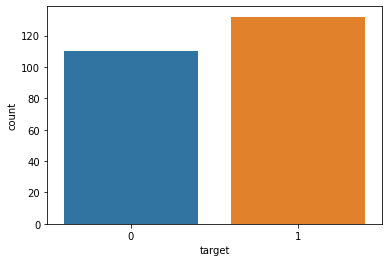

In [23]:
sns.countplot(Xy_train['target'])

#### age

In [24]:
df_desc['age']

description    Age of the patient
Name: age, dtype: object

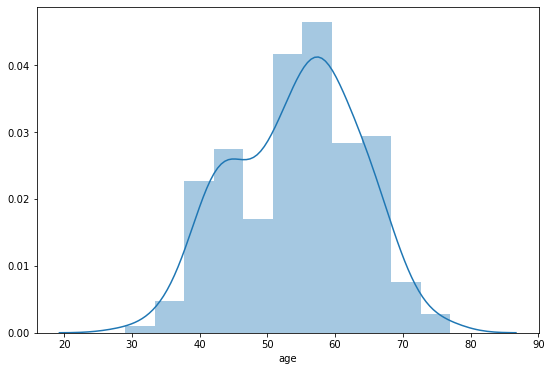

In [25]:
# Plotting histogram of age
plt.figure(figsize=(9,6))
sns.distplot(Xy_train['age'])

In [26]:
# finding outliers in age column
Q1 = Xy_train['age'].quantile(0.25)
Q3 = Xy_train['age'].quantile(0.75)
IQR = Q3-Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['age']>ub) +  sum(Xy_train['age']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  82.0
Lower bound:  26.0
No of outliers:  0


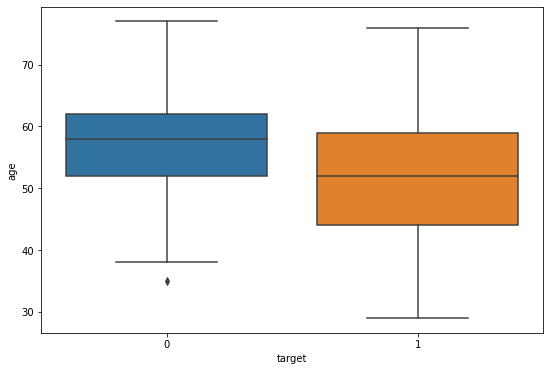

In [27]:
# Relationship between age and target

plt.figure(figsize=(9,6))
sns.boxplot(x=Xy_train['target'], y=Xy_train['age'])

In [28]:
df_desc['target']

description    The patient has heart disease or not - (1=Yes, 0=No)
Name: target, dtype: object

In [29]:
# Lets see if there is a significant impact of age on target using independent sample t-test
from scipy.stats import ttest_ind

Ho = 'There is no significant impact of age on target (No predictability)'
Ha = 'There is a significant impact of age on target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ind1 = Xy_train[Xy_train['target']==0]
ind2 = Xy_train[Xy_train['target']==1]

stat, p = ttest_ind(ind1['age'], ind2['age'])

print('Test stat: ', stat)
print('p-value: ', p)
print('\n')

alpha = 0.05

if p>0.05:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant impact of age on target (No predictability)
Ha:  There is a significant impact of age on target (Good predictor)


Test stat:  3.4337259127698454
p-value:  0.0007011676040972032


Reject Ho,  There is a significant impact of age on target (Good predictor)


In [30]:
# age can be a good predictor

#### gender

In [31]:
df_desc['gender']

description    Gender of the patient - (0,1) - (Male, Female)
Name: gender, dtype: object

In [32]:
Xy_train.gender.value_counts()

1    165
0     77
Name: gender, dtype: int64

In [33]:
Xy_test.gender.value_counts()

1    42
0    19
Name: gender, dtype: int64

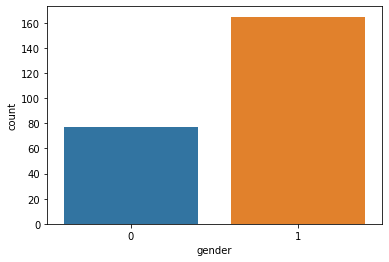

In [34]:
sns.countplot(Xy_train.gender)

In [35]:
# Lets create a crosstab between gender and target

pd.crosstab(Xy_train.gender, Xy_train.target, margins=True)

target,0,1,All
gender,,,
0,21,56,77
1,89,76,165
All,110,132,242


In [36]:
print(df_desc['gender'])
print(df_desc['target'])

description    Gender of the patient - (0,1) - (Male, Female)
Name: gender, dtype: object
description    The patient has heart disease or not - (1=Yes, 0=No)
Name: target, dtype: object


In [37]:
# out of 77 male patients 56 (73%) have heart disease and 21 (27%) does not have heart disease

# out of 165 female patients 76 (46%) have heart disease and 89 (54%) does not have heart disease

In [38]:
# so male patients have a high risk of having heart disease compared to females.

In [39]:
Xy_train['gender'] = Xy_train['gender'].astype('str')
Xy_test['gender'] = Xy_test['gender'].astype('str')

In [40]:
# Lets find the assosiation between gender and target using chi-square test

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between gender and target (No predictability)'
Ha = 'There is a signigicant assosiation between gender and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ct = pd.crosstab(Xy_train.gender, Xy_train.target)

chi2, p, dof, ex = chi2_contingency(ct)

print('p-value: ', p)
alpha = 0.05

if p>alpha:
    print('Fail to reject Ho, ', Ho)
    
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between gender and target (No predictability)
Ha:  There is a signigicant assosiation between gender and target (Good predictor)


p-value:  0.0001826717911095503
Reject Ho,  There is a signigicant assosiation between gender and target (Good predictor)


In [41]:
# from the test we can conclude that gender can be a good predictor for target

#### chest_pain

In [42]:
df_desc['chest_pain']

description    It refers to the chest pain experienced by the patient -(0,1,2,3)
Name: chest_pain, dtype: object

In [43]:
Xy_train.chest_pain.dtypes

dtype('int64')

In [44]:
# chest_pain can be of ordinal level data

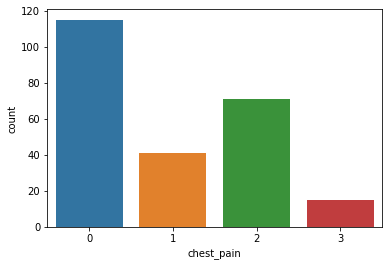

In [45]:
# Lets see the countplot of chest_pain
sns.countplot(Xy_train.chest_pain)

In [46]:
# cross tabulation
pd.crosstab(Xy_train.chest_pain, Xy_train.target, margins=True)

target,0,1,All
chest_pain,,,
0,85,30,115
1,8,33,41
2,13,58,71
3,4,11,15
All,110,132,242


In [47]:
# If the patient has 0 chest_pain, then 85 (74%) of them has no heart disease and 30 (26%) of them has heart disease

# If the patient has 1 chest_pain, then 8 (20%) of them has no heart disease and 33 (80%) of them has heart disease

# If the patient has 2 chest_pain, then 13 (18%) of them has no heart disease and 58 (82%) of them has heart disease

# If the patient has 3 chest_pain, then 4 (27%) of them has no heart disease and 11 (73%) of them has heart disease

In [48]:
# We can see that as the chest_pain levels increase, the risk of getting heart disease also increases

In [49]:
# Lets see if there is a significant impact between chest_pain and target
# Since chest_pain is an ordinal level data, we can consider it as continuous.

from scipy.stats import ttest_ind

Ho = 'There is no significant impact of chest_pain on target (No predictability)'
Ha = 'There is a significant impact of chest_pain on target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ind1 = Xy_train[Xy_train['target']==0]
ind2 = Xy_train[Xy_train['target']==1]

stat, p = ttest_ind(ind1['chest_pain'], ind2['chest_pain'])
print('Test statistics: ', stat)
print('p-value: ', p)

alpha = 0.05

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)



Ho:  There is no significant impact of chest_pain on target (No predictability)
Ha:  There is a significant impact of chest_pain on target (Good predictor)


Test statistics:  -8.366633222170258
p-value:  4.9024704007530585e-15
Reject Ho,  There is a significant impact of chest_pain on target (Good predictor)


In [50]:
# chest_pain is a good predictor

#### rest_bps

In [51]:
df_desc['rest_bps']

description    Blood pressure of the patient while resting(in mm/Hg)
Name: rest_bps, dtype: object

In [52]:
Xy_train['rest_bps'].head()

19     140
247    160
289    128
288    110
60     110
Name: rest_bps, dtype: int64

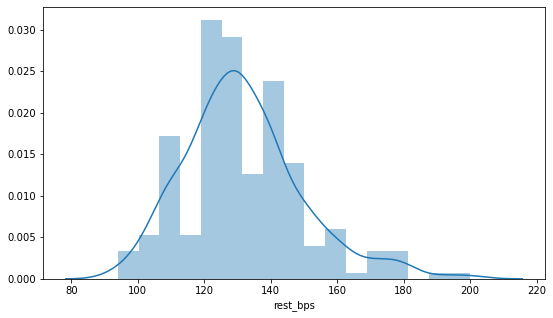

In [53]:
# Lets plot a histogram of rest_bps
plt.figure(figsize=(9,5))
sns.distplot(Xy_train['rest_bps'])

In [54]:
# Checking for outliers

Q1 = Xy_train.rest_bps.quantile(0.25)
Q3 = Xy_train.rest_bps.quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['rest_bps']>ub) + sum(Xy_train['rest_bps']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('Number of ouliers: ', no_of_out)

Upper bound:  170.0
Lower bound:  90.0
Number of ouliers:  9


In [55]:
# We have outliers.
# Since we have less samples, we can equate outliers to upper bound and lower bound

Xy_train['rest_bps'][Xy_train['rest_bps']>ub] = ub
Xy_train['rest_bps'][Xy_train['rest_bps']<lb] = lb

In [56]:
# Checking for outliers

Q1 = Xy_train.rest_bps.quantile(0.25)
Q3 = Xy_train.rest_bps.quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['rest_bps']>ub) + sum(Xy_train['rest_bps']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('Number of ouliers: ', no_of_out)

Upper bound:  170.0
Lower bound:  90.0
Number of ouliers:  0


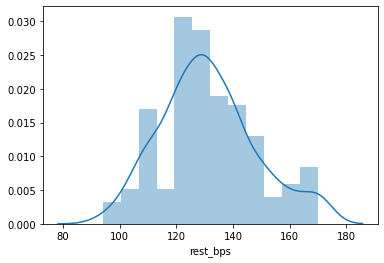

In [57]:
# All the outliers have been removed from rest_bp column. 
# Now lets plot a histogram again

sns.distplot(Xy_train.rest_bps)

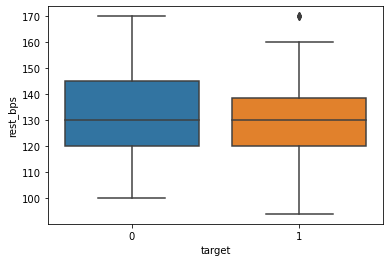

In [58]:
sns.boxplot(x=Xy_train['target'], y=Xy_train['rest_bps'])

In [59]:
# Lets see if there is a significant impact of rest_bps on target using independent sample t-test

from scipy.stats import ttest_ind

Ho = 'There is no significant impact of rest_bps on target (No predictability)'
Ha = 'There is a significant impact of rest_bps on target (Good predictor)'

print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ind1 = Xy_train[Xy_train['target']==0]
ind2 = Xy_train[Xy_train['target']==1]

stat, p = ttest_ind(ind1['rest_bps'], ind2['rest_bps'])
print('Test statistics: ', stat)
print('p-value: ', p)

alpha = 0.05
if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)
    

Ho:  There is no significant impact of rest_bps on target (No predictability)
Ha:  There is a significant impact of rest_bps on target (Good predictor)


Test statistics:  2.0122032268778227
p-value:  0.04531594888884973
Reject Ho,  There is a significant impact of rest_bps on target (Good predictor)


In [60]:
# If you notice the p-value (0.045), it is very close to 0.05. This means, the null hypothesis was rejected with a
# marginal difference. So the impact of rest_bps on target is very minimal.

# So we can create a model with rest_bps and without rest_bps and compare the results.

action['can_drop'] = ['rest_bps']

#### cholestrol

In [61]:
df_desc['cholesterol']

description    Patient's cholesterol level (in mg/dl)
Name: cholesterol, dtype: object

In [62]:
Xy_train['cholestrol'].head()

19     239
247    246
289    205
288    335
60     265
Name: cholestrol, dtype: int64

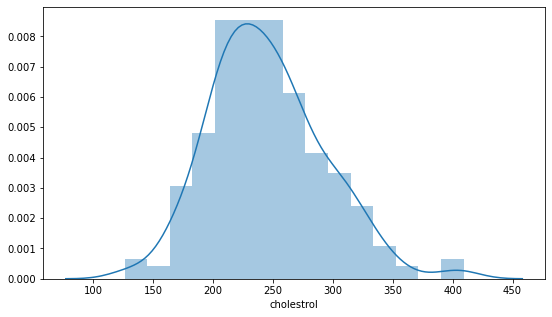

In [63]:
# Histogram

plt.figure(figsize=(9,5))
sns.distplot(Xy_train.cholestrol)

In [64]:
# Outliers

Q1 = Xy_train.cholestrol.quantile(0.25)
Q3 = Xy_train.cholestrol.quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['cholestrol']>ub) + sum(Xy_train['cholestrol']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  367.5
Lower bound:  117.5
No of outliers:  3


In [65]:
# there are 3 outliers, lets equate them to lower bound and upper bound

Xy_train['cholestrol'][Xy_train['cholestrol']>ub] = ub

In [66]:
# Outliers

Q1 = Xy_train.cholestrol.quantile(0.25)
Q3 = Xy_train.cholestrol.quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['cholestrol']>ub) + sum(Xy_train['cholestrol']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  367.5
Lower bound:  117.5
No of outliers:  0


In [67]:
# All the outliers are removed

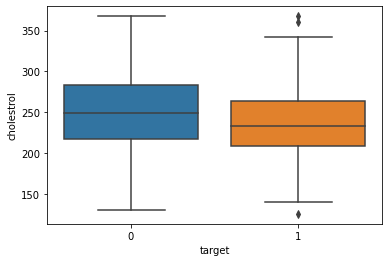

In [68]:
sns.boxplot(x=Xy_train['target'], y=Xy_train['cholestrol'])

In [69]:
# Independent sample t-test

from scipy.stats import ttest_ind

Ho = 'There is no significant impact of cholestrol on target (No predictability)'
Ha = 'There is a significant impact of cholestrol on target (Good predictor)'

print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

ind1 = Xy_train[Xy_train['target']==1]
ind2 = Xy_train[Xy_train['target']==0]

alpha = 0.05

stat, p = ttest_ind(ind1['cholestrol'], ind2['cholestrol'])
print('Test statistics: ', stat)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant impact of cholestrol on target (No predictability)
Ha:  There is a significant impact of cholestrol on target (Good predictor)


Test statistics:  -2.1407802168513834
p-value:  0.03329979581988826 

Reject Ho,  There is a significant impact of cholestrol on target (Good predictor)


In [70]:
# cholestrol can be a good predictor

#### fasting_blood_sugar

In [71]:
df_desc['fasting_blood_sugar']

description    The blood sugar of the patient while fasting
Name: fasting_blood_sugar, dtype: object

In [72]:
Xy_train['fasting_blood_sugar'].head()

19     0
247    0
289    0
288    0
60     1
Name: fasting_blood_sugar, dtype: int64

In [73]:
Xy_train['fasting_blood_sugar'].unique()

array([0, 1], dtype=int64)

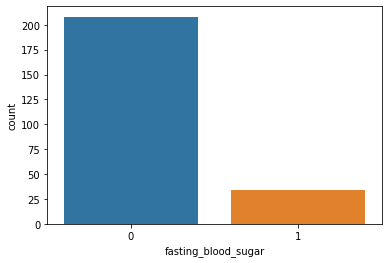

In [74]:
# count plot

sns.countplot(Xy_train['fasting_blood_sugar'])

In [75]:
Xy_train['fasting_blood_sugar'].value_counts()

0    208
1     34
Name: fasting_blood_sugar, dtype: int64

In [76]:
Xy_test['fasting_blood_sugar'].value_counts()

0    50
1    11
Name: fasting_blood_sugar, dtype: int64

In [77]:
# The proportion is uneven

In [78]:
# cross tab

pd.crosstab(Xy_train['fasting_blood_sugar'], Xy_train['target'], margins=True)

target,0,1,All
fasting_blood_sugar,,,
0,93,115,208
1,17,17,34
All,110,132,242


In [79]:
Xy_train['fasting_blood_sugar'] = Xy_train['fasting_blood_sugar'].astype('str')
Xy_test['fasting_blood_sugar'] = Xy_test['fasting_blood_sugar'].astype('str')

In [80]:
# Lets check if there is an assosiation between fasting_blood_sugar and target

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between fasting_blood_sugar and target (No predictability)'
Ha = 'There is a significant assosiation between fasting_blood_sugar and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train['fasting_blood_sugar'], Xy_train['target'])

chi2, p, dof, ex = chi2_contingency(ct)
print('Test stats: ', chi2)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between fasting_blood_sugar and target (No predictability)
Ha:  There is a significant assosiation between fasting_blood_sugar and target (Good predictor)


Test stats:  0.15085077300150843
p-value:  0.6977236514353632 

Fail to reject Ho,  There is no significant assosiation between fasting_blood_sugar and target (No predictability)


In [81]:
# There is no assosiation between the columns, so we can drop fasting_blood_sugar
action['drop'] = ['fasting_blood_sugar']

#### rest_ecg

In [82]:
df_desc['rest_ecg']

description    Potassium level (0,1,2)
Name: rest_ecg, dtype: object

In [83]:
Xy_train.rest_ecg.head()

19     1
247    1
289    2
288    1
60     0
Name: rest_ecg, dtype: int64

In [84]:
Xy_train.rest_ecg.value_counts()

1    124
0    114
2      4
Name: rest_ecg, dtype: int64

In [85]:
Xy_test.rest_ecg.value_counts()

0    33
1    28
Name: rest_ecg, dtype: int64

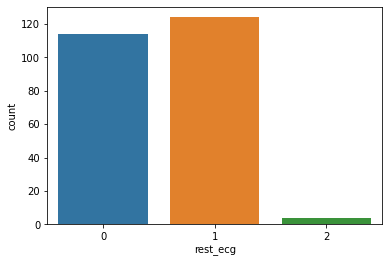

In [86]:
sns.countplot(Xy_train['rest_ecg'])

In [87]:
# Of the 3 levels in rest_ecg, level 2 has only 4 observations, so we can club it to level one.

Xy_train = Xy_train.replace({'rest_ecg': {
    2 : 1
}})

In [88]:
# we have to do the same thing for test set also

Xy_test = Xy_test.replace({'rest_ecg': {
    2 : 1
}})

In [89]:
Xy_train.rest_ecg.value_counts()

1    128
0    114
Name: rest_ecg, dtype: int64

In [90]:
Xy_test.rest_ecg.value_counts()

0    33
1    28
Name: rest_ecg, dtype: int64

In [91]:
pd.crosstab(Xy_train['rest_ecg'], Xy_train['target'], margins=True)

target,0,1,All
rest_ecg,,,
0,62,52,114
1,48,80,128
All,110,132,242


In [92]:
Xy_train['rest_ecg'] = Xy_train['rest_ecg'].astype('str')
Xy_test['rest_ecg'] = Xy_test['rest_ecg'].astype('str')

In [93]:
# Lets check if there is any significant assosiation between rest_ecg and target

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between rest_ecg and target (No predictability)'
Ha = 'There is a signigicant assosiation between rest_ecg and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train['rest_ecg'], Xy_train['target'])

chi2, p, dof, ex = chi2_contingency(ct)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between rest_ecg and target (No predictability)
Ha:  There is a signigicant assosiation between rest_ecg and target (Good predictor)


p-value:  0.01227881722148046 

Reject Ho,  There is a signigicant assosiation between rest_ecg and target (Good predictor)


In [94]:
# rest_ecg can be a good predictor

#### thalach

In [95]:
df_desc['thalach']

description    The patient’s maximum heart rate
Name: thalach, dtype: object

In [96]:
Xy_train['thalach'].head()

19     151
247    120
289    130
288    143
60     130
Name: thalach, dtype: int64

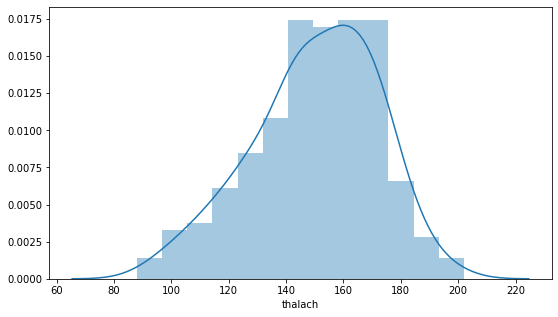

In [97]:
# Histogram
plt.figure(figsize=(9,5))
sns.distplot(Xy_train['thalach'])

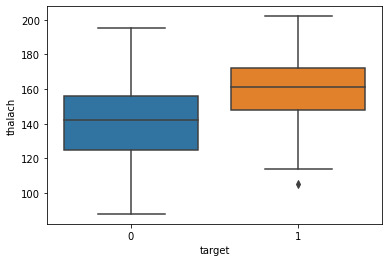

In [98]:
# Boxplot

sns.boxplot(Xy_train['target'], Xy_train['thalach'])

In [99]:
# From the boxplot it is clear that patients with high heart rate is more prone to heart diseases

In [100]:
# Outliers

Q1 = Xy_train['thalach'].quantile(0.25)
Q3 = Xy_train['thalach'].quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['thalach']>ub) + sum(Xy_train['thalach']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  209.125
Lower bound:  94.125
No of outliers:  1


In [101]:
# Lets remove the outliers

Xy_train['thalach'][Xy_train['thalach']<lb] = lb

In [102]:
# Outliers

Q1 = Xy_train['thalach'].quantile(0.25)
Q3 = Xy_train['thalach'].quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['thalach']>ub) + sum(Xy_train['thalach']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  209.125
Lower bound:  94.125
No of outliers:  0


In [103]:
# Lets see if there is an impact of thalach on target using independent sample t-test

from scipy.stats import ttest_ind

Ho = 'There is no significant relation between thalach and target (No predictability)'
Ha = 'There is a significant relation between thalach and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ind1 = Xy_train[Xy_train['target']==1]
ind2 = Xy_train[Xy_train['target']==0]

stat, p = ttest_ind(ind1['thalach'], ind2['thalach'])
print('Test stats: ', stat)
print('p-value: ', p)

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant relation between thalach and target (No predictability)
Ha:  There is a significant relation between thalach and target (Good predictor)


Test stats:  7.19921941054359
p-value:  7.739092605589851e-12
Reject Ho,  There is a significant relation between thalach and target (Good predictor)


In [104]:
# thalach can be a good predictor

#### exer_angina

In [105]:
df_desc['exer_angina']

description    It refers to exercise-induced angina - (1=Yes, 0=No)
Name: exer_angina, dtype: object

angina meaning:- a condition marked by severe pain in the chest, often also spreading to the shoulders, arms, and neck, owing to an inadequate blood supply to the heart.

In [106]:
Xy_train['exer_angina'].head()

19     0
247    1
289    1
288    1
60     0
Name: exer_angina, dtype: int64

In [107]:
Xy_train.exer_angina.value_counts()

0    160
1     82
Name: exer_angina, dtype: int64

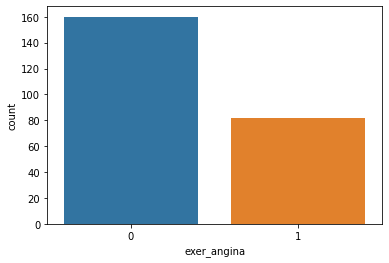

In [108]:
sns.countplot(Xy_train['exer_angina'])

In [109]:
pd.crosstab(Xy_train['exer_angina'], Xy_train['target'], margins=True)

target,0,1,All
exer_angina,,,
0,47,113,160
1,63,19,82
All,110,132,242


In [110]:
Xy_train['exer_angina'] = Xy_train['exer_angina'].astype('str')
Xy_test['exer_angina'] = Xy_test['exer_angina'].astype('str')

In [111]:
# chi2 test

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between exer_angina and target (No predictability)'
Ha = 'There is a significant assosiation between exer_angina and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train['exer_angina'], Xy_train['target'])

chi2, p, dof, ex = chi2_contingency(ct)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between exer_angina and target (No predictability)
Ha:  There is a significant assosiation between exer_angina and target (Good predictor)


p-value:  5.948962458329343e-12 

Reject Ho,  There is a significant assosiation between exer_angina and target (Good predictor)


In [112]:
# exer_angina can be a good predictor

#### old_peak

In [113]:
df_desc['old_peak']

description    It is the ST depression induced by exercise relative to rest(ST relates to the position on ECG plots)
Name: old_peak, dtype: object

In [114]:
Xy_train['old_peak'].head()

19     1.8
247    0.0
289    2.0
288    3.0
60     0.0
Name: old_peak, dtype: float64

In [115]:
Xy_train.old_peak.unique()

array([1.8, 0. , 2. , 3. , 2.3, 1.4, 0.6, 2.5, 0.8, 2.2, 1.9, 1.2, 0.5,
       0.2, 4.2, 4. , 1. , 1.6, 3.8, 0.3, 1.1, 3.2, 0.1, 0.4, 2.1, 2.8,
       1.3, 2.6, 3.4, 1.5, 3.6, 0.9, 2.4, 5.6, 4.4, 3.5, 6.2, 3.1, 0.7])

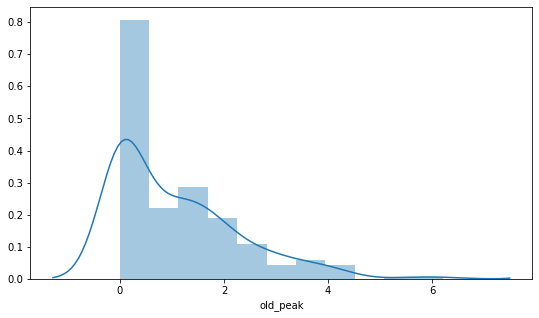

In [116]:
# Histogram

plt.figure(figsize=(9,5))
sns.distplot(Xy_train.old_peak)

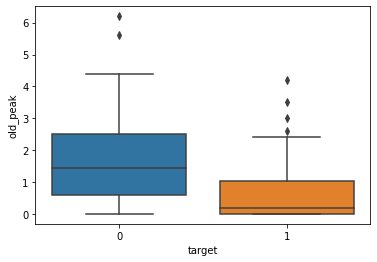

In [117]:
# Boxplot

sns.boxplot(Xy_train.target, Xy_train.old_peak)

In [118]:
# Outliers

Q1 = Xy_train['old_peak'].quantile(0.25)
Q3 = Xy_train['old_peak'].quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['old_peak']>ub) + sum(Xy_train['old_peak']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  4.5
Lower bound:  -2.7
No of outliers:  2


In [119]:
Xy_train['old_peak'][Xy_train['old_peak']>ub] = ub

In [120]:
# Outliers

Q1 = Xy_train['old_peak'].quantile(0.25)
Q3 = Xy_train['old_peak'].quantile(0.75)
IQR = Q3 - Q1

ub = Q3 + 1.5*IQR
lb = Q1 - 1.5*IQR

no_of_out = sum(Xy_train['old_peak']>ub) + sum(Xy_train['old_peak']<lb)

print('Upper bound: ', ub)
print('Lower bound: ', lb)
print('No of outliers: ', no_of_out)

Upper bound:  4.5
Lower bound:  -2.7
No of outliers:  0


In [121]:
# Lets see if there is an impact of old_peak on target

from scipy.stats import ttest_ind

Ho = 'There is no significant impact of old_peak on target (No predictability)'
Ha = 'There is a significant impact of old_peak on target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ind1 = Xy_train[Xy_train['target']==0]
ind2 = Xy_train[Xy_train['target']==1]

stat, p = ttest_ind(ind1['old_peak'], ind2['old_peak'])
print('Test stat: ', stat)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)




Ho:  There is no significant impact of old_peak on target (No predictability)
Ha:  There is a significant impact of old_peak on target (Good predictor)


Test stat:  7.806252709571919
p-value:  1.8178249707743707e-13 

Reject Ho,  There is a significant impact of old_peak on target (Good predictor)


In [122]:
# old_peak can be a good predictor

#### slope

In [123]:
df_desc['slope']

description    It refers to the slope of the peak of the exercise ST-Segment- (0,1,2)
Name: slope, dtype: object

In [124]:
Xy_train.slope.head()

19     2
247    1
289    1
288    1
60     2
Name: slope, dtype: int64

In [125]:
Xy_train.slope.value_counts()

2    117
1    108
0     17
Name: slope, dtype: int64

In [126]:
Xy_test.slope.value_counts()

1    32
2    25
0     4
Name: slope, dtype: int64

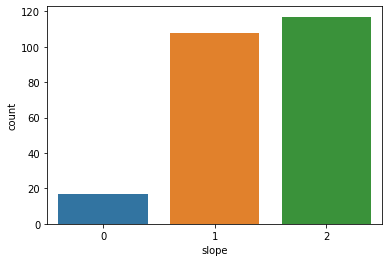

In [127]:
sns.countplot(Xy_train.slope)

In [128]:
pd.crosstab(Xy_train['slope'], Xy_train['target'], margins=True)

target,0,1,All
slope,,,
0,11,6,17
1,72,36,108
2,27,90,117
All,110,132,242


In [129]:
# convert levels of slope to string
Xy_train['slope'] = Xy_train['slope'].astype('str')
Xy_test['slope'] = Xy_test['slope'].astype('str')

In [130]:
# chi2 test

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between slope and target (No predictability)'
Ha = 'There is a significant assosiation between slope and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train['slope'], Xy_train['target'])

chi2, p, dof, ex = chi2_contingency(ct)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between slope and target (No predictability)
Ha:  There is a significant assosiation between slope and target (Good predictor)


p-value:  1.150133565175328e-10 

Reject Ho,  There is a significant assosiation between slope and target (Good predictor)


In [131]:
# slope can be a good predictor

#### ca

In [132]:
df_desc['ca']

description    Number of major vessels - (0,1,2,3,4)
Name: ca, dtype: object

In [133]:
Xy_train.ca.head()

19     2
247    3
289    1
288    1
60     1
Name: ca, dtype: int64

In [134]:
Xy_train.ca.value_counts()

0    138
1     55
2     27
3     17
4      5
Name: ca, dtype: int64

In [135]:
Xy_test.ca.value_counts()

0    37
2    11
1    10
3     3
Name: ca, dtype: int64

In [136]:
# level 5 in ca has only 5 observations, so lets club them into level 3

Xy_train = Xy_train.replace({'ca': {
    4 : 3
}})

In [137]:
Xy_train.ca.value_counts()

0    138
1     55
2     27
3     22
Name: ca, dtype: int64

In [138]:
# integer to string

Xy_train['ca'] = Xy_train['ca'].astype('str')
Xy_test['ca'] = Xy_test['ca'].astype('str')

In [139]:
pd.crosstab(Xy_train.ca, Xy_train.target, margins=True)

target,0,1,All
ca,,,
0,37,101,138
1,36,19,55
2,22,5,27
3,15,7,22
All,110,132,242


In [140]:
# Chi-square test

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between ca and target (No predictability)'
Ha = 'There is a significant assosiation between ca and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train.ca, Xy_train.target)

chi2, p, dof, ex = chi2_contingency(ct)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between ca and target (No predictability)
Ha:  There is a significant assosiation between ca and target (Good predictor)


p-value:  3.585569786507986e-10 

Reject Ho,  There is a significant assosiation between ca and target (Good predictor)


In [141]:
# ca can be a good predictor

In [142]:
Xy_train.columns

Index(['age', 'gender', 'chest_pain', 'rest_bps', 'cholestrol',
       'fasting_blood_sugar', 'rest_ecg', 'thalach', 'exer_angina', 'old_peak',
       'slope', 'ca', 'thalassemia', 'target'],
      dtype='object')

#### thalassemia

In [143]:
df_desc['thalassemia']

description    It refers to thalassemia which is a blood disorder - (0,1,2,3)
Name: thalassemia, dtype: object

In [144]:
Xy_train['thalassemia'].head()

19     2
247    1
289    3
288    3
60     2
Name: thalassemia, dtype: int64

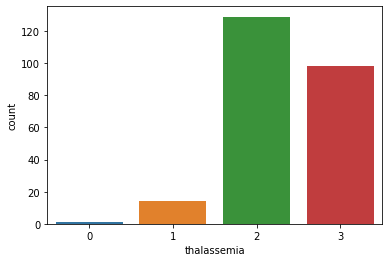

In [145]:
sns.countplot(Xy_train['thalassemia'])

In [146]:
Xy_train['thalassemia'].value_counts()

2    129
3     98
1     14
0      1
Name: thalassemia, dtype: int64

In [147]:
Xy_test['thalassemia'].value_counts()

2    37
3    19
1     4
0     1
Name: thalassemia, dtype: int64

In [148]:
# 0 has only 1 observation, we can club it into 1

Xy_train = Xy_train.replace({'thalassemia': {
    0 : 1
}})

In [149]:
Xy_test = Xy_test.replace({'thalassemia': {
    0 : 1
}})

In [150]:
Xy_train['thalassemia'].value_counts()

2    129
3     98
1     15
Name: thalassemia, dtype: int64

In [151]:
Xy_test['thalassemia'].value_counts()

2    37
3    19
1     5
Name: thalassemia, dtype: int64

In [152]:
# integer to string

Xy_train['thalassemia'] = Xy_train['thalassemia'].astype('str')
Xy_test['thalassemia'] = Xy_test['thalassemia'].astype('str')

In [153]:
pd.crosstab(Xy_train['thalassemia'], Xy_train['target'], margins=True)

target,0,1,All
thalassemia,,,
1,10,5,15
2,25,104,129
3,75,23,98
All,110,132,242


In [154]:
# Chi-square test

from scipy.stats import chi2_contingency

Ho = 'There is no significant assosiation between thalassemia and target (No predictability)'
Ha = 'There is a significant assosiation between thalassemia and target (Good predictor)'
print('Ho: ', Ho)
print('Ha: ', Ha)
print('\n')

alpha = 0.05

ct = pd.crosstab(Xy_train.thalassemia, Xy_train.target)

chi2, p, dof, ex = chi2_contingency(ct)
print('p-value: ', p, '\n')

if p>alpha:
    print('Fail to reject Ho, ', Ho)
else:
    print('Reject Ho, ', Ha)

Ho:  There is no significant assosiation between thalassemia and target (No predictability)
Ha:  There is a significant assosiation between thalassemia and target (Good predictor)


p-value:  2.744537615678705e-17 

Reject Ho,  There is a significant assosiation between thalassemia and target (Good predictor)


In [155]:
# thalassemia is a good predictor

In [156]:
# All the variables are explored

# Preprocessing

In [157]:
Xy_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242 entries, 19 to 110
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  242 non-null    int64  
 1   gender               242 non-null    object 
 2   chest_pain           242 non-null    int64  
 3   rest_bps             242 non-null    int64  
 4   cholestrol           242 non-null    float64
 5   fasting_blood_sugar  242 non-null    object 
 6   rest_ecg             242 non-null    object 
 7   thalach              242 non-null    float64
 8   exer_angina          242 non-null    object 
 9   old_peak             242 non-null    float64
 10  slope                242 non-null    object 
 11  ca                   242 non-null    object 
 12  thalassemia          242 non-null    object 
 13  target               242 non-null    int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 28.4+ KB


In [158]:
Xy_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 179 to 12
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  61 non-null     int64  
 1   gender               61 non-null     object 
 2   chest_pain           61 non-null     int64  
 3   rest_bps             61 non-null     int64  
 4   cholestrol           61 non-null     int64  
 5   fasting_blood_sugar  61 non-null     object 
 6   rest_ecg             61 non-null     object 
 7   thalach              61 non-null     int64  
 8   exer_angina          61 non-null     object 
 9   old_peak             61 non-null     float64
 10  slope                61 non-null     object 
 11  ca                   61 non-null     object 
 12  thalassemia          61 non-null     object 
 13  target               61 non-null     int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 7.1+ KB


In [159]:
X_train = Xy_train.drop('target', axis=1)
y_train = Xy_train['target']

In [160]:
X_test = Xy_test.drop('target', axis=1)
y_test = Xy_test['target']

In [161]:
X_train.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
19,69,0,3,140,239.0,0,1,151.0,0,1.8,2,2,2
247,66,1,1,160,246.0,0,1,120.0,1,0.0,1,3,1
289,55,0,0,128,205.0,0,1,130.0,1,2.0,1,1,3
288,57,1,0,110,335.0,0,1,143.0,1,3.0,1,1,3
60,71,0,2,110,265.0,1,0,130.0,0,0.0,2,1,2


In [162]:
X_test.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
197,67,1,0,125,254,1,1,163,0,0.2,1,2,3
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3
194,60,1,2,140,185,0,0,155,0,3.0,1,0,2
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3


In [163]:
y_train.head()

19     1
247    0
289    0
288    0
60     1
Name: target, dtype: int64

In [164]:
y_test.head()

179    0
197    0
285    0
194    0
188    0
Name: target, dtype: int64

In [165]:
X_train.shape

(242, 13)

In [166]:
y_train.shape

(242,)

In [167]:
X_test.shape

(61, 13)

In [168]:
y_test.shape

(61,)

In [169]:
num_cols = [col for col in X_train.columns if X_train[col].dtypes != 'O']
cat_cols = [col for col in X_train.columns if X_train[col].dtypes == 'O']

### Scaling numerical features

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
ss = StandardScaler()

In [172]:
X_train_num = ss.fit_transform(X_train[num_cols])
X_test_num = ss.transform(X_test[num_cols])

In [173]:
X_train_num = pd.DataFrame(X_train_num, columns=num_cols)
X_test_num = pd.DataFrame(X_test_num, columns=num_cols)

In [174]:
X_train_num.head()

,age,chest_pain,rest_bps,cholestrol,thalach,old_peak
0,1.610480,2.044420,0.519644,-0.117206,0.038909,0.635984
1,1.282051,0.057474,1.711059,0.033608,-1.378933,-0.911696
2,0.077810,-0.936000,-0.195205,-0.849735,-0.921564,0.807949
3,0.296763,-0.936000,-1.267479,1.951109,-0.326985,1.667771
4,1.829433,1.050947,-1.267479,0.442962,-0.921564,-0.911696


In [175]:
X_train_num.shape

(242, 6)

In [176]:
X_test_num.shape

(61, 6)

### Encoding categorical features

In [177]:
from sklearn.preprocessing import OneHotEncoder

In [178]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [179]:
X_train_cat = ohe.fit_transform(X_train[cat_cols])
X_test_cat = ohe.transform(X_test[cat_cols])

In [180]:
X_train_cat

array([[0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [181]:
X_train_cat = pd.DataFrame(X_train_cat, columns=ohe.get_feature_names())
X_test_cat = pd.DataFrame(X_test_cat, columns=ohe.get_feature_names())

In [182]:
X_train_cat.head()

,x0_1,x1_1,x2_1,x3_1,x4_1,x4_2,x5_1,x5_2,x5_3,x6_2,x6_3
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [183]:
X_train_cat.shape

(242, 11)

In [184]:
X_test_cat.shape

(61, 11)

### Combining both dataframes

In [185]:
X_train_transformed = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_transformed = pd.concat([X_test_num, X_test_cat], axis=1)

In [186]:
X_train_transformed.shape

(242, 17)

In [187]:
y_train.shape

(242,)

In [188]:
X_test_transformed.shape

(61, 17)

In [189]:
y_test.shape

(61,)

In [190]:
# Lets create a base logistic model

# Logistic model

In [191]:
from sklearn.linear_model import LogisticRegression

In [192]:
log_model = LogisticRegression()

In [193]:
log_model.fit(X_train_transformed, y_train)

LogisticRegression()

In [194]:
y_pred_log = log_model.predict(X_test_transformed)

In [195]:
y_pred_proba_log = log_model.predict_proba(X_test_transformed)

In [196]:
y_pred_log

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [197]:
y_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

## Model Evaluation

#### accuracy

In [198]:
from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_test, y_pred_log)

In [199]:
acc_log

0.8360655737704918

#### precision

In [200]:
from sklearn.metrics import precision_score
pre_log = precision_score(y_test, y_pred_log)

In [201]:
pre_log

0.8108108108108109

#### recall

In [202]:
from sklearn.metrics import recall_score
rec_log = recall_score(y_test, y_pred_log)

In [203]:
rec_log

0.9090909090909091

#### log loss

In [204]:
from sklearn.metrics import log_loss
log_loss_log = log_loss(y_test, y_pred_proba_log[:,1])

In [205]:
log_loss_log

0.4363490803202189

#### Classification report

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.81      0.91      0.86        33

    accuracy                           0.84        61
   macro avg       0.84      0.83      0.83        61
weighted avg       0.84      0.84      0.83        61



#### Confusion matrix

In [207]:
from sklearn.metrics import confusion_matrix
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_log), index=[['Actual', 'Actual'],[0,1]],
            columns=[['Prediction','Prediction'],[0,1]])
cm

Prediction    
                  0   1
Actual 0         21   7
       1          3  30

In [208]:
acc_0_log = cm['Prediction'][0]['Actual'][0]/(cm['Prediction'][0]['Actual'][0] + cm['Prediction'][0]['Actual'][1])
acc_0_log

0.875

In [209]:
acc_1_log = cm['Prediction'][1]['Actual'][1]/(cm['Prediction'][1]['Actual'][0] + cm['Prediction'][1]['Actual'][1])
acc_1_log

0.8108108108108109

#### ROC Curve

In [210]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba_log[:,1])
roc_auc_log = auc(fpr, tpr)
roc_auc_log

0.8777056277056278

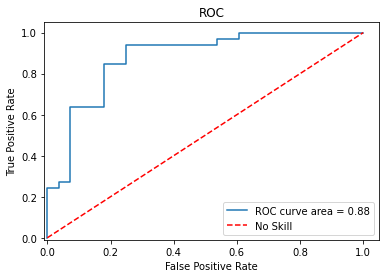

In [211]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve area = %.2f'%roc_auc_log)
plt.plot([0,1], [0,1], 'r--', label='No Skill')
plt.xlim([-0.01,1.05])
plt.ylim([-0.01,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

In [212]:
# Lets create a decision tree

# Decision Tree

In [213]:
from sklearn.tree import DecisionTreeClassifier

In [214]:
dt = DecisionTreeClassifier()

In [215]:
dt.fit(X_train_transformed, y_train)

DecisionTreeClassifier()

In [216]:
y_pred_dt = dt.predict(X_test_transformed)

In [217]:
y_pred_proba_dt = dt.predict_proba(X_test_transformed)

In [218]:
y_pred_dt

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [219]:
y_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

## Model Evaluation

#### accuracy

In [220]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test, y_pred_dt)

In [221]:
acc_dt

0.7377049180327869

#### classification report 

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69        28
           1       0.73      0.82      0.77        33

    accuracy                           0.74        61
   macro avg       0.74      0.73      0.73        61
weighted avg       0.74      0.74      0.74        61



#### confusion matrix

In [223]:
from sklearn.metrics import confusion_matrix

In [224]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dt), index=[['Actual', 'Actual'], [0,1]],
            columns=[['Prediction', 'Prediction'], [0,1]])
cm

Prediction    
                  0   1
Actual 0         18  10
       1          6  27

In [225]:
acc_0_dt = cm['Prediction'][0]['Actual'][0]/(cm['Prediction'][0]['Actual'][0] + cm['Prediction'][0]['Actual'][1])
acc_0_dt

0.75

In [226]:
acc_1_dt = cm['Prediction'][1]['Actual'][1]/(cm['Prediction'][1]['Actual'][0] + cm['Prediction'][1]['Actual'][1])
acc_1_dt

0.7297297297297297

#### log loss

In [227]:
from sklearn.metrics import log_loss
log_loss_dt = log_loss(y_test, y_pred_proba_dt[:,1])

In [228]:
log_loss_dt

9.059482267096277

#### ROC Curve

In [229]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba_dt[:,1])
roc_auc_dt = auc(fpr, tpr)
roc_auc_dt

0.7305194805194806

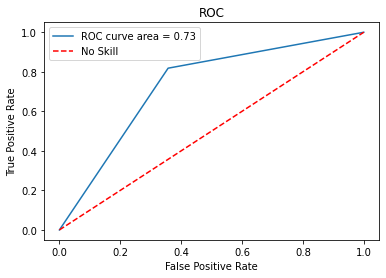

In [230]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve area = %.2f'%roc_auc_dt)
plt.plot([0,1], [0,1],'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Decision Tree 2

In [231]:
from sklearn.tree import DecisionTreeClassifier

In [232]:
##########______________________________________________

In [233]:
# dt_2 = DecisionTreeClassifier()

In [234]:
# Lets use grid search cv to select best parameters

In [235]:
# from sklearn.model_selection import GridSearchCV

In [236]:
# param_grid = {
#     'criterion' : ["gini", "entropy"],
#     'splitter' : ["best", "random"],
#     'max_depth' : range(1,40),
#     'min_samples_split' : range(1,40),
#     'min_samples_leaf' : range(1,20),
#     'max_features' : ["auto", "sqrt", "log2"]
# }

In [237]:
# dt_2_grid = GridSearchCV(dt_2, param_grid, scoring='accuracy')

In [238]:
# dt_2_grid.fit(X_train_transformed, y_train)

In [239]:
# y_pred_dt_2 = dt_2_grid.predict(X_test_transformed)

In [240]:
# y_pred_proba_dt_2 = dt_2_grid.predict_proba(X_test_transformed)

In [241]:
# y_pred_dt_2

In [242]:
# y_test.values

In [243]:
###############_______________________________________________________

In [244]:
# since grid search is taking too much time, lets compare the parameters of the base decision tree model,
# and select the parametrs accordingly

In [245]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [246]:
# 
dt.get_depth()

7

In [247]:
dt.get_n_leaves()

39

In [248]:
dt.criterion

'gini'

In [249]:
param_grid = {
    'criterion' : "gini",
    'splitter' : "best",
    'max_depth' : 5,
    'min_samples_split' : 20,
    'min_samples_leaf' : 10,
    'max_features' : "sqrt"
}

In [250]:
param_grid

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 5,
 'min_samples_split': 20,
 'min_samples_leaf': 10,
 'max_features': 'sqrt'}

In [251]:
# Lets create a decision tree with the above parameters

In [252]:
dt_3 = DecisionTreeClassifier(criterion='gini',
                             splitter='best',
                             max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf=10,
                             max_features='sqrt')

In [253]:
dt_3.fit(X_train_transformed, y_train)

DecisionTreeClassifier(max_depth=5, max_features='sqrt', min_samples_leaf=10,
                       min_samples_split=20)

In [254]:
y_pred_dt_3 = dt_3.predict(X_test_transformed)

In [255]:
y_pred_proba_dt_3 = dt_3.predict_proba(X_test_transformed)

## Model Evaluation

#### accuracy

In [256]:
from sklearn.metrics import accuracy_score
acc_dt_3 = accuracy_score(y_test, y_pred_dt_3)

In [257]:
acc_dt_3

0.7213114754098361

#### classification report 

In [258]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_dt_3))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69        28
           1       0.74      0.76      0.75        33

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



#### confusion matrix

In [259]:
from sklearn.metrics import confusion_matrix

In [260]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_dt_3), index=[['Actual', 'Actual'], [0,1]],
            columns=[['Prediction', 'Prediction'], [0,1]])
cm

Prediction    
                  0   1
Actual 0         19   9
       1          8  25

In [261]:
acc_0_dt_3 = cm['Prediction'][0]['Actual'][0]/(cm['Prediction'][0]['Actual'][0] + cm['Prediction'][0]['Actual'][1])
acc_0_dt_3

0.7037037037037037

In [262]:
acc_1_dt_3 = cm['Prediction'][1]['Actual'][1]/(cm['Prediction'][1]['Actual'][0] + cm['Prediction'][1]['Actual'][1])
acc_1_dt_3

0.7352941176470589

#### log loss

In [263]:
from sklearn.metrics import log_loss
log_loss_dt_3 = log_loss(y_test, y_pred_proba_dt_3[:,1])

In [264]:
log_loss_dt_3

1.192580920841467

#### ROC Curve

In [265]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba_dt_3[:,1])
roc_auc_dt_3 = auc(fpr, tpr)
roc_auc_dt_3

0.7548701298701299

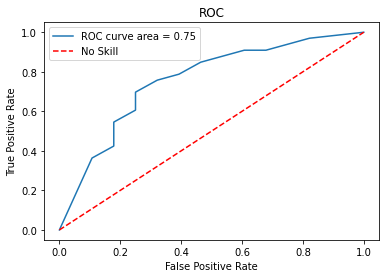

In [266]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve area = %.2f'%roc_auc_dt_3)
plt.plot([0,1], [0,1],'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Random Forest

In [267]:
from sklearn.ensemble import RandomForestClassifier

In [268]:
rfc = RandomForestClassifier()

In [269]:
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier()

In [270]:
y_pred_rfc = rfc.predict(X_test_transformed)

In [271]:
y_pred_proba_rfc = rfc.predict_proba(X_test_transformed)

In [272]:
y_pred_rfc

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

In [273]:
y_test.values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1], dtype=int64)

## Model Evaluation

#### accuracy

In [274]:
from sklearn.metrics import accuracy_score
acc_rfc = accuracy_score(y_test, y_pred_rfc)

In [275]:
acc_rfc

0.7540983606557377

#### classification report 

In [276]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.78      0.64      0.71        28
           1       0.74      0.85      0.79        33

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



#### confusion matrix

In [277]:
from sklearn.metrics import confusion_matrix

In [278]:
cm = pd.DataFrame(confusion_matrix(y_test, y_pred_rfc), index=[['Actual', 'Actual'], [0,1]],
            columns=[['Prediction', 'Prediction'], [0,1]])
cm

Prediction    
                  0   1
Actual 0         18  10
       1          5  28

In [279]:
acc_0_rfc = cm['Prediction'][0]['Actual'][0]/(cm['Prediction'][0]['Actual'][0] + cm['Prediction'][0]['Actual'][1])
acc_0_rfc

0.782608695652174

In [280]:
acc_1_rfc = cm['Prediction'][1]['Actual'][1]/(cm['Prediction'][1]['Actual'][0] + cm['Prediction'][1]['Actual'][1])
acc_1_rfc

0.7368421052631579

#### log loss

In [281]:
from sklearn.metrics import log_loss
log_loss_rfc = log_loss(y_test, y_pred_proba_rfc[:,1])

In [282]:
log_loss_rfc

0.46010939242621735

#### ROC Curve

In [283]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, th = roc_curve(y_test, y_pred_proba_rfc[:,1])
roc_auc_rfc = auc(fpr, tpr)
roc_auc_rfc

0.8593073593073594

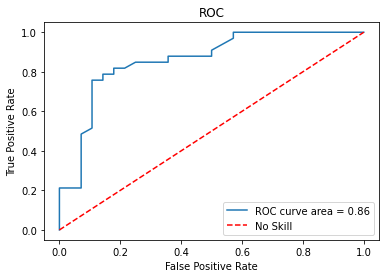

In [284]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve area = %.2f'%roc_auc_rfc)
plt.plot([0,1], [0,1],'r--', label='No Skill')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend()
plt.show()

# Model comparison

In [286]:
model_comparison = {
    'model' : ['Logistic Regression','Decision Tree', 'Decision Tree 2', 'Random Forest'],
    'accuracy' : [acc_log, acc_dt, acc_dt_3, acc_rfc],
    'accuracy of 0': [acc_0_log, acc_0_dt, acc_0_dt_3, acc_0_rfc],
    'accuracy of 1': [acc_1_log, acc_1_dt, acc_1_dt_3, acc_1_rfc],
    'log_loss' : [log_loss_log, log_loss_dt, log_loss_dt_3, log_loss_rfc],
    'auc' : [roc_auc_log, roc_auc_dt, roc_auc_dt_3, roc_auc_rfc]
}

In [289]:
model_comparison = pd.DataFrame(model_comparison)
model_comparison

,model,accuracy,accuracy of 0,accuracy of 1,log_loss,auc
0,Logistic Regression,0.836066,0.875000,0.810811,0.436349,0.877706
1,Decision Tree,0.737705,0.750000,0.729730,9.059482,0.730519
2,Decision Tree 2,0.721311,0.703704,0.735294,1.192581,0.754870
3,Random Forest,0.754098,0.782609,0.736842,0.460109,0.859307


In [1]:
# We can see that the logistic regression model performs best for this dataset